# **02 - Sale Price Study**

## Objectives

*   Answer business requirement 1: 
    * The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visualisations of the correlated variables against the sale price to show that.

## Inputs

* outputs/datasets/collection/house_prices_records.csv

## Outputs

* generate code that answers business requirement 1 and can be used to build the Streamlit App






---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/pieterkdevilliers/Desktop/Development/Code Institute/pp5-heritage-housing/pp5-heritage-housing/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/pieterkdevilliers/Desktop/Development/Code Institute/pp5-heritage-housing/pp5-heritage-housing'

# Load Data

In [5]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/house_prices_records.csv")
    )
df.head(5)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


---

# Data Exploration

Install Requirements

In [ ]:
%pip install ipywidgets==8.0.2 feature_engine plotly nbformat seaborn


In [6]:
from pandas_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

/var/folders/vg/xr2t0ncx7c98wfntvs622gs80000gn/T/ipykernel_23506/962869596.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

# Correlation Study

We use `.corr()` for `spearman` and `pearson` methods, and investigate the top 10 correlations
* We know this command returns a pandas series and the first item is the correlation between Churn and Churn, which happens to be 1, so we exclude that with `[1:]`
* We sort values considering the absolute value, by setting `key=abs`

In [7]:
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

/var/folders/vg/xr2t0ncx7c98wfntvs622gs80000gn/T/ipykernel_23506/1835576946.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)


OverallQual     0.809829
GrLivArea       0.731310
YearBuilt       0.652682
GarageArea      0.649379
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
OpenPorchSF     0.477561
LotArea         0.456461
Name: SalePrice, dtype: float64

We do the same for `pearson`

In [8]:
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

/var/folders/vg/xr2t0ncx7c98wfntvs622gs80000gn/T/ipykernel_23506/819116545.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)


OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

We will consider the top correlation levels

In [9]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

Therefore we are studying at df the following variables. We will investigate if:
* A larger 1stFlrSF leads to a higher SalePrice.
* A larger GarageArea leads to a higher SalePrice.
* A larger GrLivArea leads to a higher SalePrice.
* How the OverallQual influences SalePrice.
* A larger TotalBsmntSF leads to a higher SalePrice.
* How the YearBuilt influences SalePrice.

In [10]:
vars_to_study = ['1stFlrSF', 'GarageArea', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']
vars_to_study

['1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt']

# EDA on selected variables

In [11]:
df_eda = df.filter(vars_to_study + ['SalePrice'])
df_eda.head(3)

,1stFlrSF,GarageArea,GrLivArea,OverallQual,TotalBsmtSF,YearBuilt,SalePrice
0,856,548,1710,7,856,2003,208500
1,1262,460,1262,6,1262,1976,181500
2,920,608,1786,7,920,2001,223500


## Variables Distribution by SalePrice

We plot the distribution (numerical and categorical) coloured by SalePrice

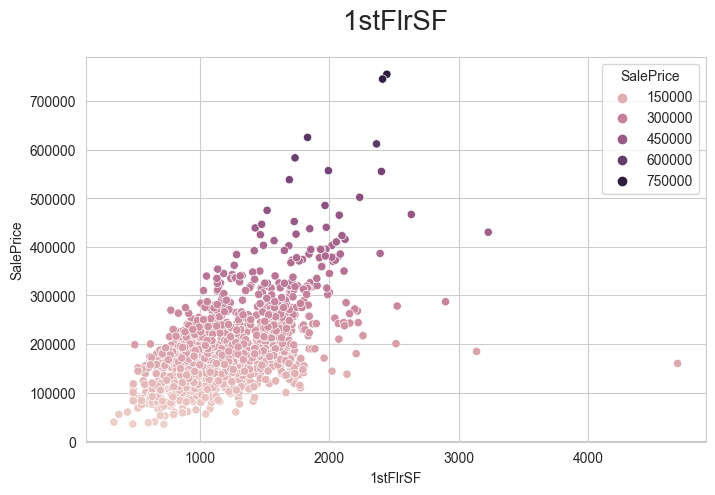

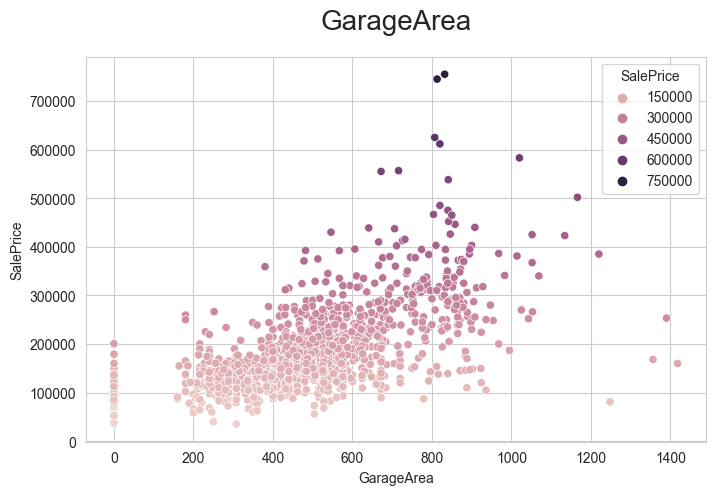

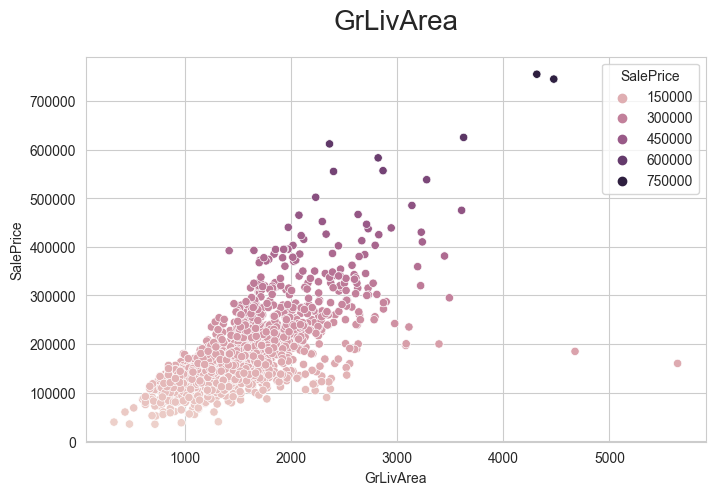

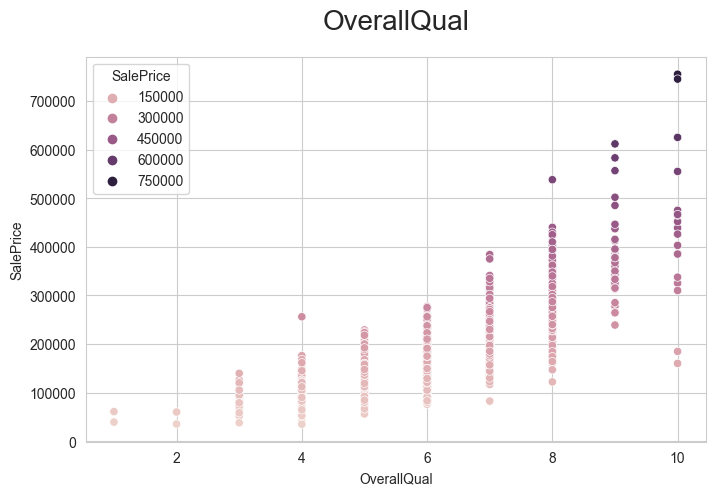

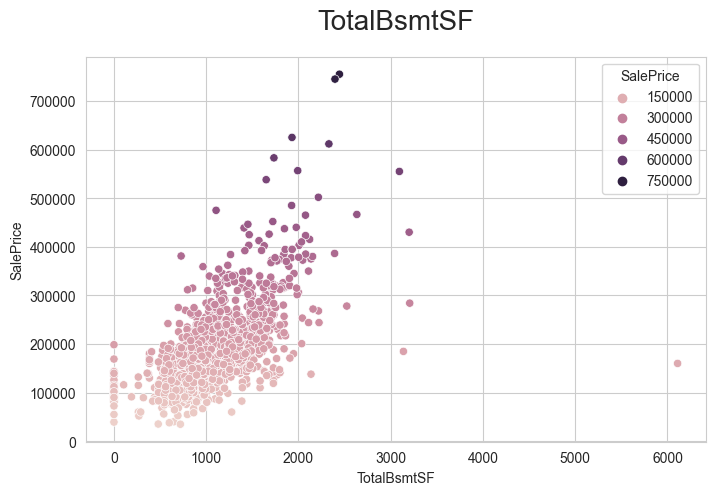

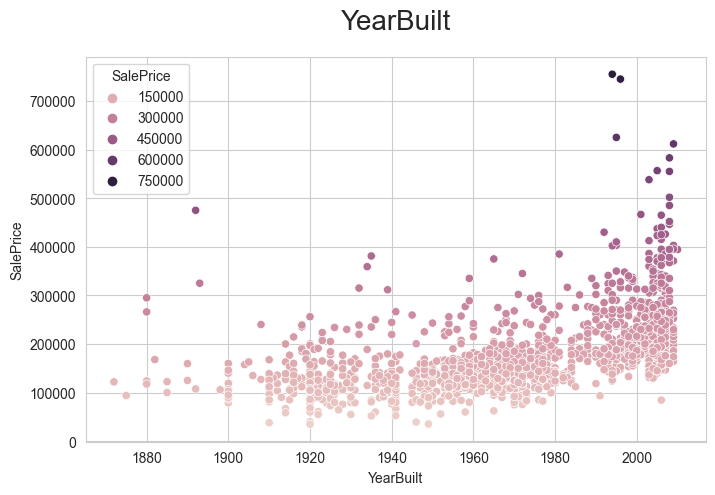

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


def plot_numerical(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=col, y=target_var, hue=target_var)
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


target_var = 'SalePrice'
for col in vars_to_study:
    plot_numerical(df_eda, col, target_var)
    print("\n\n")


## Parallel Plot

Because the SalePrice has so many data pints, we create a separate DataFrame and transform `SalePrice` (numerical) into bins (categorical) for visualising at `parallel_categories()` plot


In [13]:
from feature_engine.discretisation import ArbitraryDiscretiser
import numpy as np
saleprice_map = [-np.Inf, 50000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, np.Inf]
disc = ArbitraryDiscretiser(binning_dict={'SalePrice': saleprice_map})
df_parallel = disc.fit_transform(df_eda)
df_parallel.head()

,1stFlrSF,GarageArea,GrLivArea,OverallQual,TotalBsmtSF,YearBuilt,SalePrice
0,856,548,1710,7,856,2003,3
1,1262,460,1262,6,1262,1976,2
2,920,608,1786,7,920,2001,3
3,961,642,1717,7,756,1915,2
4,1145,836,2198,8,1145,2000,3


In [14]:
disc.binner_dict_['SalePrice']

[-inf, 50000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, inf]

NOTE

Create a map to replace the `SalePrice` variable with more informative levels.

In [15]:
n_classes = len(saleprice_map) - 1
classes_ranges = disc.binner_dict_['SalePrice'][1:-1]

labels_map = {}
for n in range(0, n_classes):
    if n == 0:
        labels_map[n] = f"<{classes_ranges[0]}"
    elif n == n_classes-1:
        labels_map[n] = f"+{classes_ranges[-1]}"
    else:
        labels_map[n] = f"{classes_ranges[n-1]} to {classes_ranges[n]}"

labels_map


{0: '<50000',
 1: '50000 to 100000',
 2: '100000 to 200000',
 3: '200000 to 300000',
 4: '300000 to 400000',
 5: '400000 to 500000',
 6: '500000 to 600000',
 7: '600000 to 700000',
 8: '+700000'}

Replace using `.replace()`

In [16]:
df_parallel['SalePrice'] = df_parallel['SalePrice'].replace(labels_map.keys())
df_parallel.head()

,1stFlrSF,GarageArea,GrLivArea,OverallQual,TotalBsmtSF,YearBuilt,SalePrice
0,856,548,1710,7,856,2003,3
1,1262,460,1262,6,1262,1976,2
2,920,608,1786,7,920,2001,3
3,961,642,1717,7,756,1915,2
4,1145,836,2198,8,1145,2000,3


Creates multi-dimensional categorical data plot

In [34]:
import plotly.express as px
fig = px.parallel_categories(data_frame=df_parallel, dimensions=['1stFlrSF', 'GarageArea', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt'], color='SalePrice')
fig.show()